In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import utility
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow
import math

## Data Preparation

In [2]:
data1 = pd.read_csv('../data/Turbine1.csv', sep=";")
data2 = pd.read_csv('../data/Turbine2.csv', sep=";")

In [3]:
data1.rename(columns=lambda x: x.strip(), inplace=True)
data2.rename(columns=lambda x: x.strip(), inplace=True)

In [4]:
data1.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4'],
      dtype='object')

In [5]:
data2.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4'],
      dtype='object')

In [6]:
data1["Dat/Zeit"] = data1["Dat/Zeit"].replace(',', '', regex=True)
data2["Dat/Zeit"] = data2["Dat/Zeit"].replace(',', '', regex=True)

In [7]:
data1["time"] = pd.to_datetime(data1["Dat/Zeit"], dayfirst=True, errors="coerce")
data1["date"]= data1["time"].dt.date
data1["hour"] = data1["time"].dt.hour
data1["weekday"] = data1["time"].dt.weekday
data1["min"] = data1["time"].dt.minute
data1["day"] = data1["time"].dt.day

In [8]:
data2["time"] = pd.to_datetime(data2["Dat/Zeit"], dayfirst=True, errors="coerce")
data2["date"]= data2["time"].dt.date
data2["hour"] = data2["time"].dt.hour
data2["weekday"] = data2["time"].dt.weekday
data2["min"] = data2["time"].dt.minute
data2["day"] = data2["time"].dt.day

In [9]:
data_new_1 = data1.loc[1:, :]
data_new_2 = data2.loc[1:, :]

In [10]:
data_new_1.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_5420\2059965022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_1.sort_values(by=['time'], inplace=True)


In [11]:
data_new_2.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_5420\3214561398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_2.sort_values(by=['time'], inplace=True)


In [12]:
data_new_1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0


In [13]:
data_new_1 = data_new_1.replace(',', '.', regex=True)
data_new_2 = data_new_2.replace(',', '.', regex=True)

In [14]:
data_new_1[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]] = data_new_1[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]].apply(pd.to_numeric)

In [15]:
data_new_2[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]] = data_new_2[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]].apply(pd.to_numeric)

In [16]:
print(min(data_new_1["date"]))
print(max(data_new_1["date"]))

2016-01-01
2016-03-31


In [17]:
print(min(data_new_2["date"]))
print(max(data_new_2["date"]))

2016-01-01
2016-03-31


In [18]:
cols_list = ["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]

## Modeling with hourly data, grouped by date and hour

In [65]:
data_new_1.groupby(["date", "hour"])[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]].mean()

Wind  Rotor      Azimut       Prod. 1       Prod. 2  \
date       hour                                                            
2016-01-01 0.0   6.140000   10.9  161.300000  3.153316e+07  5.742991e+06   
           1.0   7.216667   16.0  154.233333  3.153354e+07  5.743049e+06   
           2.0   6.416667   16.0  157.300000  3.153402e+07  5.743049e+06   
           3.0   6.200000   16.0  163.183333  3.153434e+07  5.743049e+06   
           4.0   6.766667   14.9  164.700000  3.153471e+07  5.743049e+06   
...                   ...    ...         ...           ...           ...   
2016-03-31 19.0  5.350000   10.0    2.133333  3.230059e+07  5.865932e+06   
           20.0  4.316667   10.0  303.183333  3.230059e+07  5.866088e+06   
           21.0  4.716667   10.0  350.250000  3.230059e+07  5.866223e+06   
           22.0  5.133333   10.0  357.383333  3.230059e+07  5.866406e+06   
           23.0  5.333333   10.0  179.733333  3.230059e+07  5.866614e+06   

                     BtrStd 1      BtrStd 2      Gen1-      Lager      Außen  \
date       hour                                                                
2016-01-01 0.0   48371.000000  46008.000000  16.640000  54.340000   7.180000   
           1.0   48371.833333  46008.000000  22.300000  63.200000   7.000000   
           2.0   48372.833333  46008.000000  22.083333  62.900000   6.516667   
           3.0   48373.833333  46008.000000  20.716667  62.516667   6.000000   
           4.0   48374.833333  46008.000000  20.800000  63.016667   6.000000   
...                       ...           ...        ...        ...        ...   
2016-03-31 19.0  49430.000000  46887.833333  21.050000  53.783333  11.000000   
           20.0  49430.000000  46888.833333  17.033333  51.050000  10.200000   
           21.0  49430.000000  46889.833333  15.033333  50.200000   9.533333   
           22.0  49430.000000  46890.833333  16.116667  51.383333   9.000000   
           23.0  49430.000000  46891.833333  16.850000  52.033333   8.633333   

                 ...  Abgabe  Bezug  KH-Zähl1  KH-Zähl2  KH-DigiE  KH-DigiI  \
date       hour  ...                                                          
2016-01-01 0.0   ...     0.0    0.0       0.0       0.0       0.0       0.0   
           1.0   ...     0.0    0.0       0.0       0.0       0.0       0.0   
           2.0   ...     0.0    0.0       0.0       0.0       0.0       0.0   
           3.0   ...     0.0    0.0       0.0       0.0       0.0       0.0   
           4.0   ...     0.0    0.0       0.0       0.0       0.0       0.0   
...              ...     ...    ...       ...       ...       ...       ...   
2016-03-31 19.0  ...  1595.0   71.0       0.0       0.0       0.0       0.0   
           20.0  ...  1595.0   71.0       0.0       0.0       0.0       0.0   
           21.0  ...  1595.0   71.0       0.0       0.0       0.0       0.0   
           22.0  ...  1595.0   71.0       0.0       0.0       0.0       0.0   
           23.0  ...  1595.0   71.0       0.0       0.0       0.0       0.0   

                 KH-Ana-1  KH-Ana-2  KH-Ana-3    Leistung  
date       hour                                            
2016-01-01 0.0        0.0       0.0       0.0  317.320000  
           1.0        0.0       0.0       0.0  566.366667  
           2.0        0.0       0.0       0.0  376.633333  
           3.0        0.0       0.0       0.0  337.266667  
           4.0        0.0       0.0       0.0  408.916667  
...                   ...       ...       ...         ...  
2016-03-31 19.0       0.0       0.0       0.0  217.866667  
           20.0       0.0       0.0       0.0  126.166667  
           21.0       0.0       0.0       0.0  154.716667  
           22.0       0.0       0.0       0.0  199.000000  
           23.0       0.0       0.0       0.0  228.433333  

[2184 rows x 28 columns]

In [66]:
data_new_1_hourly = data_new_1.groupby(["date", "hour"])[cols_list].mean().reset_index()["Leistung"]

In [67]:
data_new_1_hourly

0       317.320000
1       566.366667
2       376.633333
3       337.266667
4       408.916667
           ...    
2179    217.866667
2180    126.166667
2181    154.716667
2182    199.000000
2183    228.433333
Name: Leistung, Length: 2184, dtype: float64

Text(0.5, 1.0, 'All Leistung grouped by date and hour')

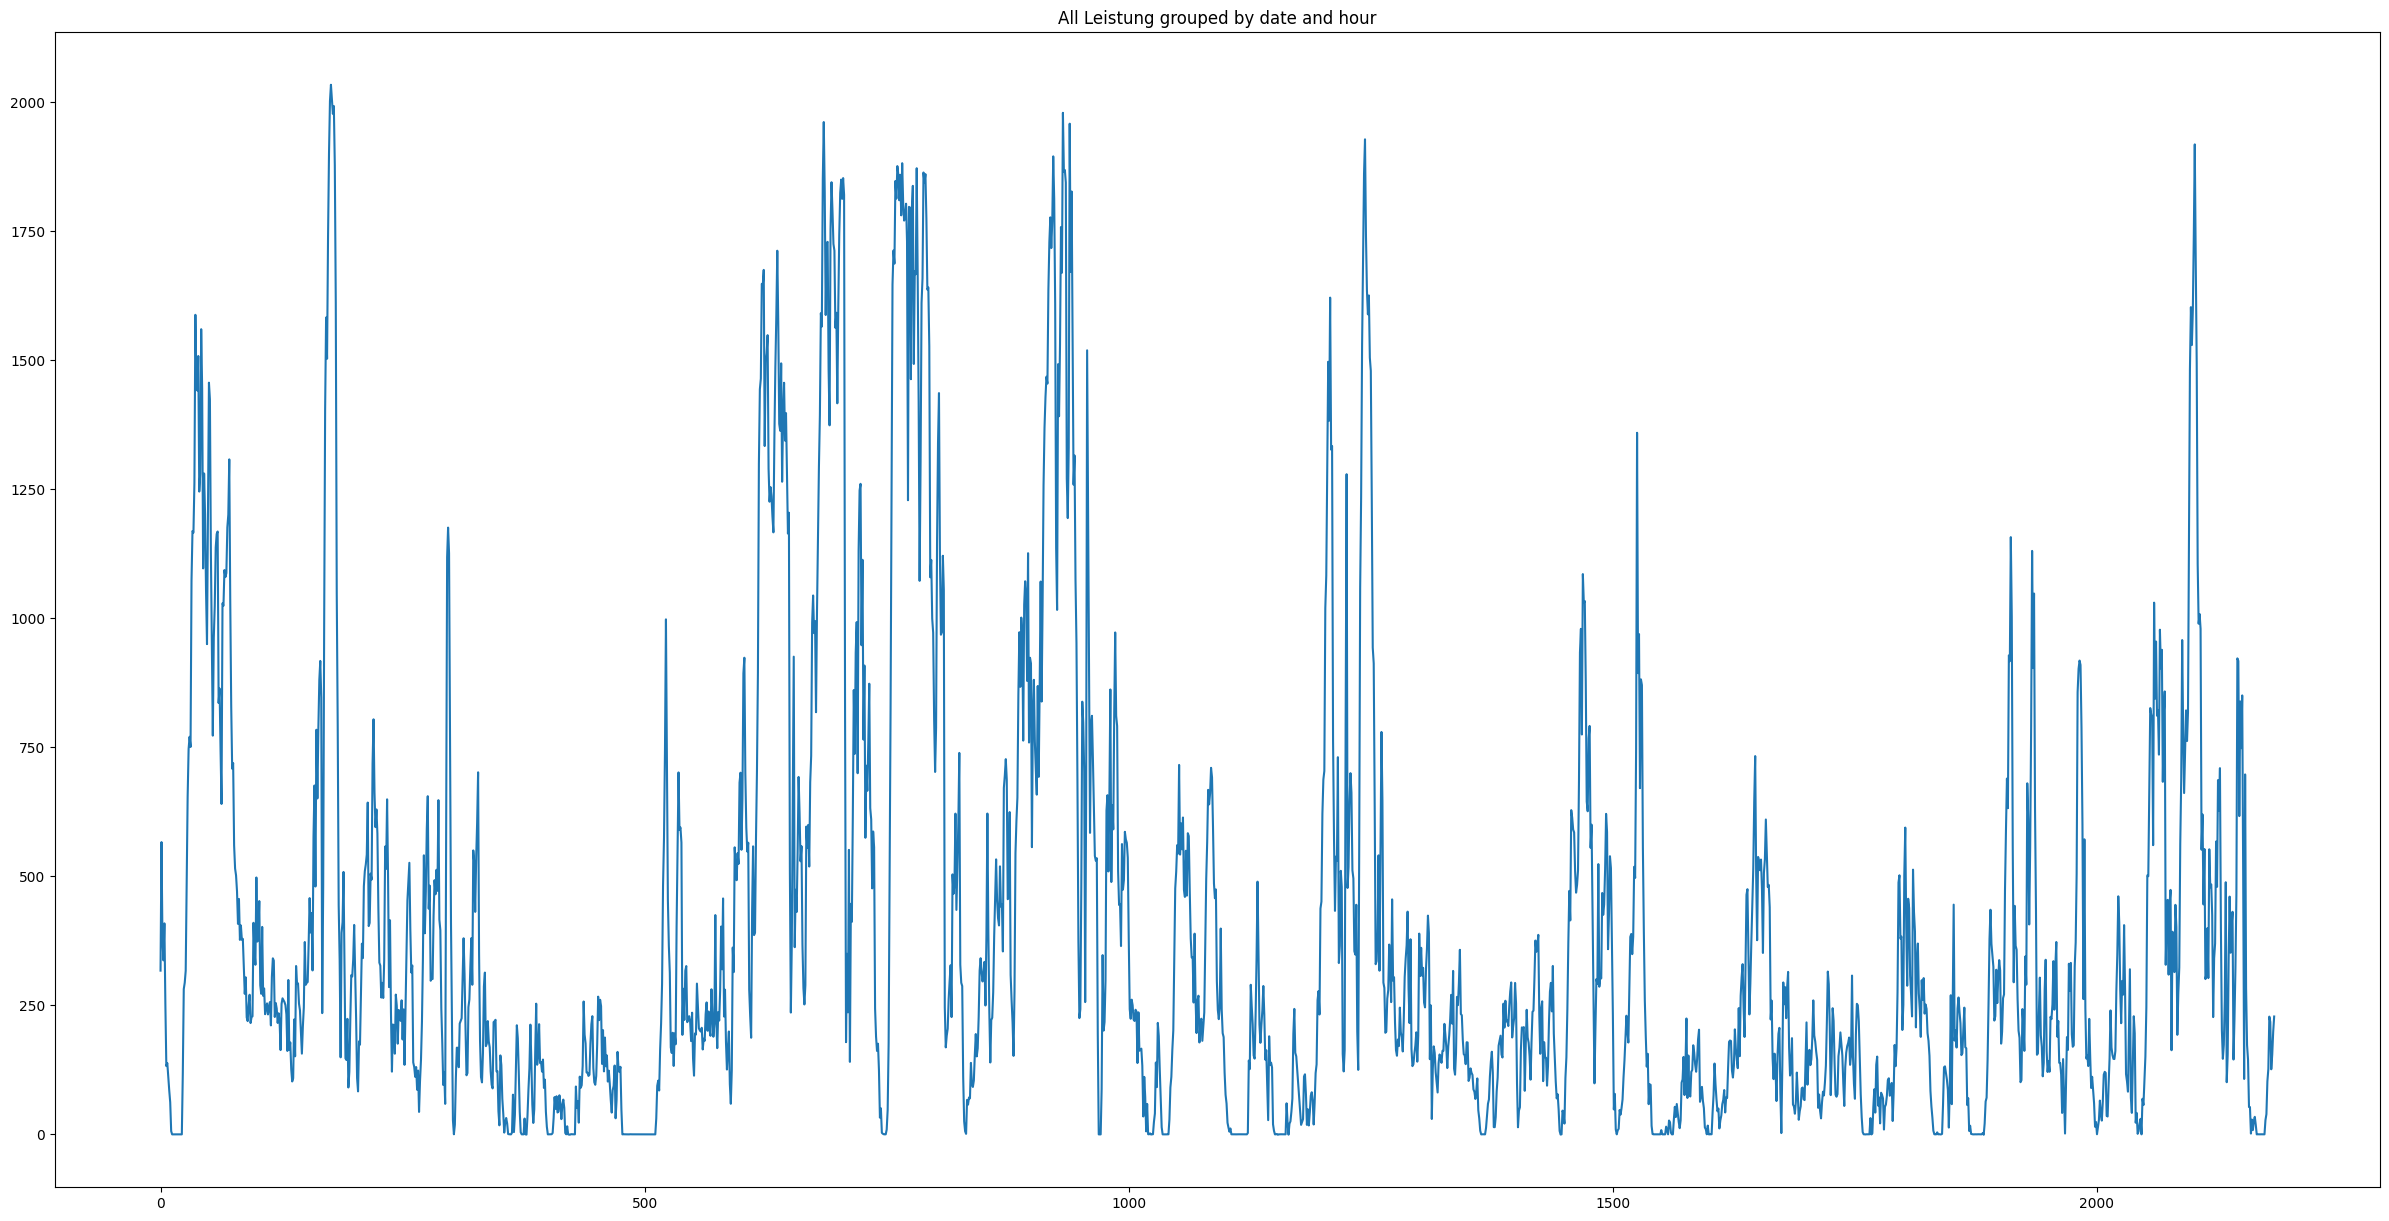

In [68]:
plt.figure(figsize=(30,15))
plt.plot(data_new_1_hourly)
plt.title("All Leistung grouped by date and hour")

### Model Designing - Univariate Modelling

In [69]:
## Standardizing the data

scaler=MinMaxScaler(feature_range=(0,1))
data_new_1_hourly=scaler.fit_transform(np.array(data_new_1_hourly).reshape(-1,1))

In [70]:
data_new_1_hourly

array([[0.1563292 ],
       [0.27873391],
       [0.18548129],
       ...,
       [0.07641079],
       [0.09817574],
       [0.11264202]])

In [71]:
train_data, val_data, test_data = utility.train_test_split_(data_new_1_hourly)

In [72]:
train_data

array([[0.1563292 ],
       [0.27873391],
       [0.18548129],
       ...,
       [0.06830935],
       [0.05737362],
       [0.02081473]])

In [73]:
time_step = 10
X_train, y_train = utility.dataset_creation(train_data, time_step)
X_val, y_val = utility.dataset_creation(val_data, time_step)
X_test, y_test = utility.dataset_creation(test_data, time_step)

In [74]:
print(X_train.shape), print(y_train.shape)

(1954, 10)
(1954,)


(None, None)

In [75]:
## Reshaping the data so that it can be inputted into the DL model

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [77]:
hist =  model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 8s 78ms/step - loss: 0.0336 - val_loss: 0.0162
Epoch 2/100
31/31 [==============================] - 1s 42ms/step - loss: 0.0193 - val_loss: 0.0142
Epoch 3/100
31/31 [==============================] - 1s 42ms/step - loss: 0.0170 - val_loss: 0.0124
Epoch 4/100
31/31 [==============================] - 2s 61ms/step - loss: 0.0139 - val_loss: 0.0101
Epoch 5/100
31/31 [==============================] - 2s 52ms/step - loss: 0.0123 - val_loss: 0.0102
Epoch 6/100
31/31 [==============================] - 1s 47ms/step - loss: 0.0113 - val_loss: 0.0086
Epoch 7/100
31/31 [==============================] - 1s 44ms/step - loss: 0.0101 - val_loss: 0.0082
Epoch 8/100
31/31 [==============================] - 1s 43ms/step - loss: 0.0104 - val_loss: 0.0084
Epoch 9/100
31/31 [==============================] - 1s 43ms/step - loss: 0.0084 - val_loss: 0.0068
Epoch 10/100
31/31 [==============================] - 1s 44ms/step - loss: 0.0074 - val_loss: 0.0062

Text(0.5, 1.0, 'Loss Curve of Univariate Time Series Model')

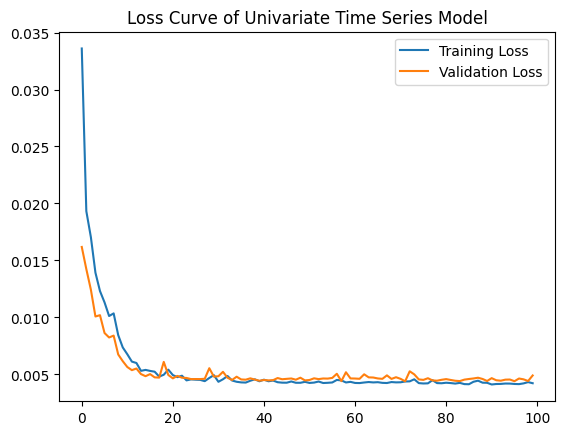

In [78]:
# print(hist["val_loss"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Loss Curve of Univariate Time Series Model")

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

4/4 [==============================] - 0s 3ms/step


In [80]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Test data predictions')

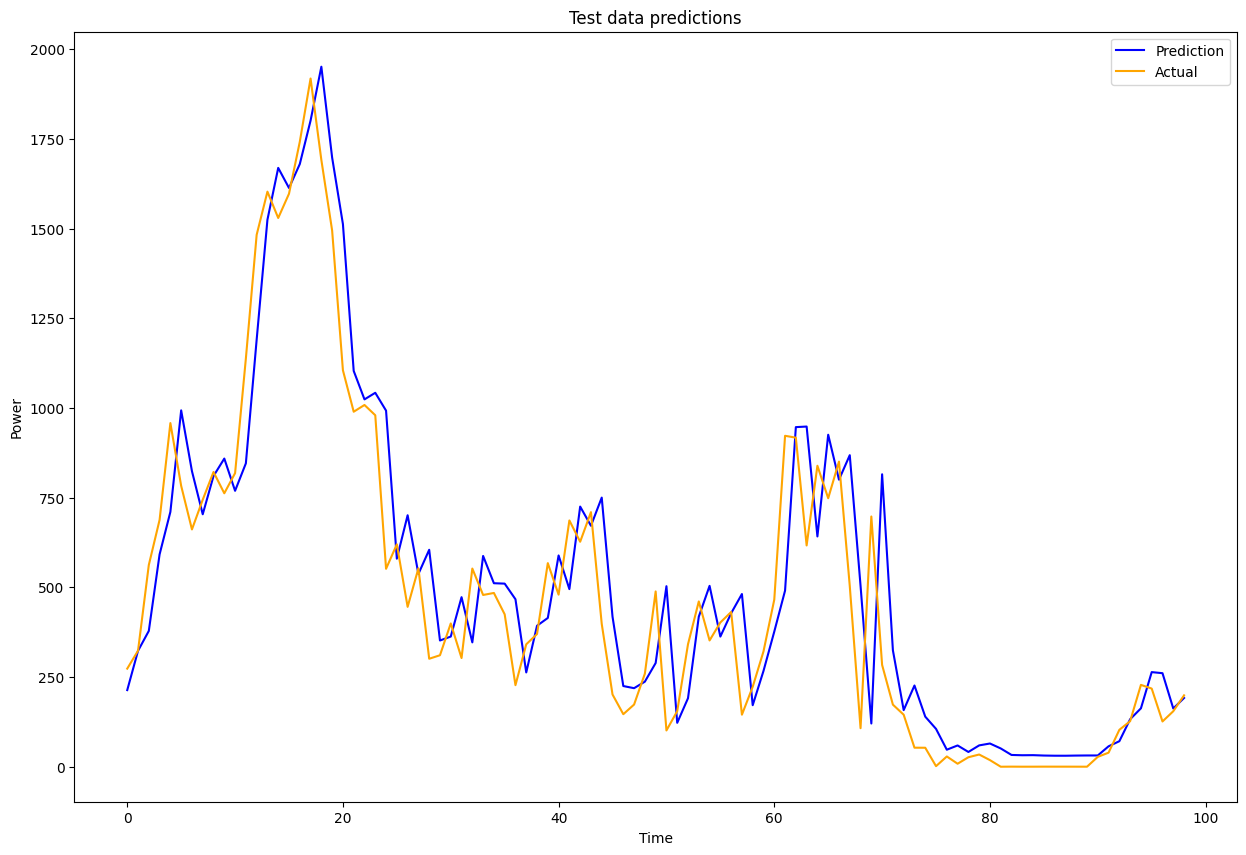

In [81]:
plt.figure(figsize=(15,10))
plt.plot(list(range(X_test.shape[0])), test_predict.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.plot(list(range(X_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Time")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [82]:
### Test Data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

180.92502338188257

In [83]:
y_test

array([[2.73450000e+02],
       [3.23416667e+02],
       [5.62366667e+02],
       [6.88133333e+02],
       [9.57883333e+02],
       [7.83016667e+02],
       [6.61433333e+02],
       [7.44316667e+02],
       [8.21600000e+02],
       [7.62216667e+02],
       [8.18350000e+02],
       [1.13775000e+03],
       [1.48256667e+03],
       [1.60295000e+03],
       [1.52955000e+03],
       [1.59718333e+03],
       [1.74178333e+03],
       [1.91833333e+03],
       [1.69138333e+03],
       [1.49456667e+03],
       [1.10508333e+03],
       [9.89566667e+02],
       [1.00833333e+03],
       [9.79700000e+02],
       [5.51683333e+02],
       [6.19933333e+02],
       [4.45616667e+02],
       [5.52966667e+02],
       [3.00983333e+02],
       [3.10750000e+02],
       [3.99416667e+02],
       [3.02950000e+02],
       [5.52416667e+02],
       [4.78766667e+02],
       [4.84366667e+02],
       [4.24800000e+02],
       [2.27316667e+02],
       [3.41233333e+02],
       [3.69933333e+02],
       [5.67516667e+02],


In [84]:
test_predict

array([[ 213.60628 ],
       [ 323.1552  ],
       [ 378.56476 ],
       [ 591.9671  ],
       [ 710.40094 ],
       [ 993.3435  ],
       [ 823.94666 ],
       [ 703.7032  ],
       [ 810.26825 ],
       [ 858.9787  ],
       [ 769.1227  ],
       [ 845.67285 ],
       [1190.091   ],
       [1524.6876  ],
       [1669.1766  ],
       [1613.2002  ],
       [1679.8176  ],
       [1801.0261  ],
       [1951.188   ],
       [1697.8807  ],
       [1512.5458  ],
       [1103.2737  ],
       [1023.9245  ],
       [1042.3243  ],
       [ 992.587   ],
       [ 579.9401  ],
       [ 701.0067  ],
       [ 537.38385 ],
       [ 604.7303  ],
       [ 351.86703 ],
       [ 362.84882 ],
       [ 472.63748 ],
       [ 346.5718  ],
       [ 587.51556 ],
       [ 511.50626 ],
       [ 510.3985  ],
       [ 466.85083 ],
       [ 262.80402 ],
       [ 393.015   ],
       [ 414.69458 ],
       [ 588.90894 ],
       [ 495.07117 ],
       [ 725.1466  ],
       [ 671.6772  ],
       [ 750.18805 ],
       [ 4